In [1]:
# -*- coding: utf-8 -*-
import re
import time
import random
import math
import numpy as np
import pandas as pd
import importlib
from mymodels import TRAINED_MODELS
from tinderweb import TinderAutomator, Controller
from data_interface import Allowance, Backlog
from gpt3 import Gpt3
import logging
from selenium.common.exceptions import *
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

from matplotlib import pyplot as plt
import cv2

import urllib
from PIL import Image
import os
import re
import shutil

TLSv1.3


In [2]:
STATUS_CODE = {0: "NEW",
              1: "RUNNING",
              2: "DONE",
              3: "EXPIRED",
              4: "ERRONOUS"}

In [3]:
TRAINED_MODELS

{'bikini': mymodels.BikiniModel, 'beauty': mymodels.BeautyModel}

In [4]:
path_prefix = "/Users/philippskudlik/local_dev/tndr/automator/"
folder_name = "images"

In [5]:
# create logger with 'spam_application'
logger = logging.getLogger('TA')
logger.setLevel(logging.INFO)
# create file handler which logs even debug messages
fh = logging.FileHandler('run.log', 'w', 'utf-8')
fh.setLevel(logging.INFO)
logger.addHandler(fh)

In [6]:
# initialize automator and models
ta = TinderAutomator()
controller = Controller(ta)
bikini_model = TRAINED_MODELS["bikini"]()
beauty_model = TRAINED_MODELS["beauty"]()

Opened card! Retrieved open_card_infos.
('Lena', '25', 356, 'db')

Lena, 25, 356km, db: Scraping 5 picture(s)...
Lena_25_356_db_0
Lena_25_356_db_1
Lena_25_356_db_2
Lena_25_356_db_3
Lena_25_356_db_4
Lena_25_356_db

pic_count: 5
bikini pic: None
beautyscore: None

choice: None


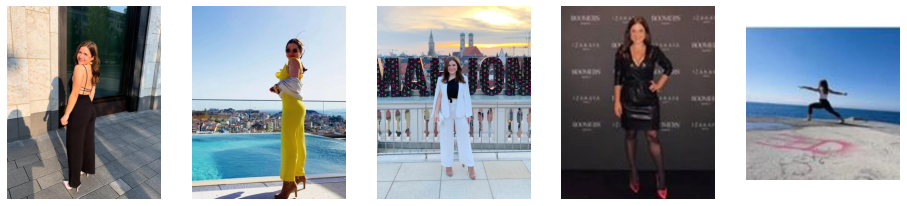

images/Lena_25_356_db_0.jpg: no_bikini, tensor([[ 0.4250, -0.3278]])
images/Lena_25_356_db_1.jpg: no_bikini, tensor([[ 0.7750, -0.4907]])
images/Lena_25_356_db_2.jpg: no_bikini, tensor([[ 1.1508, -0.8799]])
images/Lena_25_356_db_3.jpg: no_bikini, tensor([[ 1.5620, -1.5672]])
images/Lena_25_356_db_4.jpg: no_bikini, tensor([[ 0.9335, -0.5468]])
images/Lena_25_356_db_0.jpg: hot, tensor([[-0.6503,  0.4921]])
images/Lena_25_356_db_1.jpg: not, tensor([[ 0.5632, -0.6164]])
images/Lena_25_356_db_2.jpg: not, tensor([[ 0.4800, -0.5603]])
images/Lena_25_356_db_3.jpg: not, tensor([[ 0.5778, -0.5630]])
images/Lena_25_356_db_4.jpg: not, tensor([[ 1.0177, -1.0196]])
Evaluated choice to left because of beautyscore
Swiping left. Closing card!
Swiping!
Opened card! Retrieved open_card_infos.
('Mü', '26', 356, '117')

Mü, 26, 356km, 117: Scraping 7 picture(s)...
Mü_26_356_117_0
Mü_26_356_117_1
Mü_26_356_117_2
Mü_26_356_117_3
Mü_26_356_117_4
Mü_26_356_117_5
Mü_26_356_117_6
Mü_26_356_117

pic_count: 7
biki

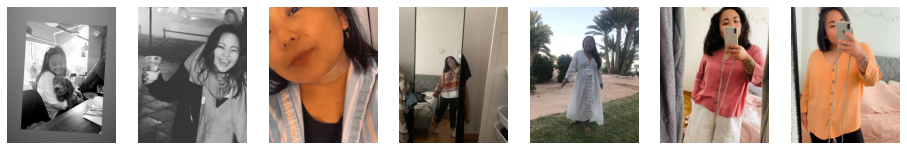

images/Mü_26_356_117_0.jpg: no_bikini, tensor([[ 1.0113, -0.8670]])
images/Mü_26_356_117_1.jpg: no_bikini, tensor([[ 1.0347, -1.3474]])
images/Mü_26_356_117_2.jpg: no_bikini, tensor([[ 1.4619, -1.2247]])
images/Mü_26_356_117_3.jpg: no_bikini, tensor([[ 1.1157, -0.7977]])
images/Mü_26_356_117_4.jpg: no_bikini, tensor([[ 0.7383, -0.5795]])
images/Mü_26_356_117_5.jpg: no_bikini, tensor([[ 1.1729, -0.9504]])
images/Mü_26_356_117_6.jpg: no_bikini, tensor([[ 1.4400, -1.0525]])
images/Mü_26_356_117_0.jpg: not, tensor([[ 0.5510, -0.5998]])
images/Mü_26_356_117_1.jpg: hot, tensor([[-0.4299,  0.3931]])
images/Mü_26_356_117_2.jpg: not, tensor([[ 0.0700, -0.0992]])
images/Mü_26_356_117_3.jpg: not, tensor([[ 0.6519, -0.7411]])
images/Mü_26_356_117_4.jpg: not, tensor([[ 0.7869, -0.7695]])
images/Mü_26_356_117_5.jpg: not, tensor([[ 0.6543, -0.7460]])
images/Mü_26_356_117_6.jpg: not, tensor([[ 0.4067, -0.5350]])
Evaluated choice to left because of beautyscore
Swiping left. Closing card!
Swiping!
Opene

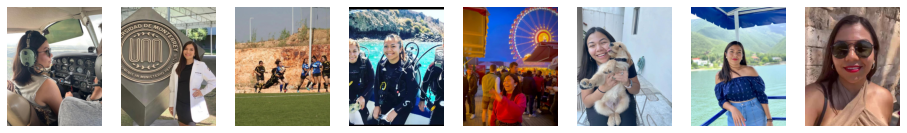

images/Ana_25_356_f8_0.jpg: no_bikini, tensor([[ 0.6690, -0.4169]])
images/Ana_25_356_f8_1.jpg: no_bikini, tensor([[ 1.4528, -1.2065]])
images/Ana_25_356_f8_2.jpg: no_bikini, tensor([[ 0.7681, -0.5697]])
images/Ana_25_356_f8_3.jpg: no_bikini, tensor([[ 1.2400, -1.0672]])
images/Ana_25_356_f8_4.jpg: no_bikini, tensor([[ 1.2753, -1.2436]])
images/Ana_25_356_f8_5.jpg: no_bikini, tensor([[ 0.9717, -0.7354]])
images/Ana_25_356_f8_6.jpg: no_bikini, tensor([[ 1.0056, -0.6847]])
images/Ana_25_356_f8_7.jpg: no_bikini, tensor([[ 0.7111, -0.3258]])
images/Ana_25_356_f8_0.jpg: not, tensor([[ 0.7473, -0.8656]])
images/Ana_25_356_f8_1.jpg: hot, tensor([[-0.4883,  0.3430]])
images/Ana_25_356_f8_2.jpg: not, tensor([[ 1.4660, -1.3526]])
images/Ana_25_356_f8_3.jpg: not, tensor([[ 1.7225, -1.7365]])
images/Ana_25_356_f8_4.jpg: not, tensor([[ 1.1679, -1.1716]])
images/Ana_25_356_f8_5.jpg: not, tensor([[ 1.5005, -1.6586]])
images/Ana_25_356_f8_6.jpg: not, tensor([[ 0.1657, -0.1890]])
images/Ana_25_356_f8_7

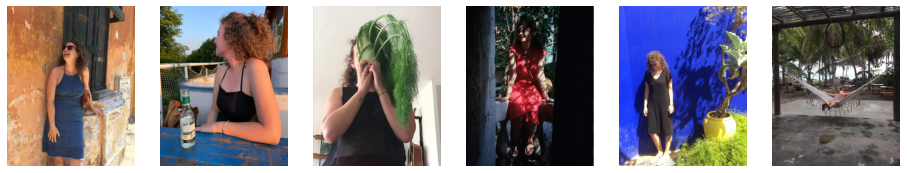

images/Christina_31_356_d8_0.jpg: no_bikini, tensor([[ 0.8231, -0.8882]])
images/Christina_31_356_d8_1.jpg: no_bikini, tensor([[ 0.2159, -0.0314]])
images/Christina_31_356_d8_2.jpg: no_bikini, tensor([[ 0.7604, -0.4812]])
images/Christina_31_356_d8_3.jpg: no_bikini, tensor([[ 0.8096, -0.7883]])
images/Christina_31_356_d8_4.jpg: no_bikini, tensor([[ 1.2246, -1.2767]])
images/Christina_31_356_d8_5.jpg: no_bikini, tensor([[ 0.4772, -0.4982]])
images/Christina_31_356_d8_0.jpg: hot, tensor([[-0.3908,  0.3588]])
images/Christina_31_356_d8_1.jpg: hot, tensor([[-0.1492,  0.0508]])
images/Christina_31_356_d8_2.jpg: not, tensor([[ 0.0093, -0.0632]])
images/Christina_31_356_d8_3.jpg: not, tensor([[ 0.6915, -0.6942]])
images/Christina_31_356_d8_4.jpg: not, tensor([[ 1.2456, -0.9862]])
images/Christina_31_356_d8_5.jpg: not, tensor([[ 0.7929, -0.8186]])
Evaluated choice to left because of beautyscore
Swiping left. Closing card!
Swiping!
Opened card! Retrieved open_card_infos.
('Larina', '30', 354, '

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":".profileCard__slider__img"}
  (Session info: chrome=103.0.5060.134)
Stacktrace:
0   chromedriver                        0x0000000103691ef9 chromedriver + 4480761
1   chromedriver                        0x000000010361d5d3 chromedriver + 4003283
2   chromedriver                        0x00000001032b0338 chromedriver + 410424
3   chromedriver                        0x00000001032e65bd chromedriver + 632253
4   chromedriver                        0x00000001032e6841 chromedriver + 632897
5   chromedriver                        0x00000001032db2b7 chromedriver + 586423
6   chromedriver                        0x0000000103303a8d chromedriver + 752269
7   chromedriver                        0x00000001032db1f5 chromedriver + 586229
8   chromedriver                        0x0000000103303b6e chromedriver + 752494
9   chromedriver                        0x00000001033164f1 chromedriver + 828657
10  chromedriver                        0x0000000103303953 chromedriver + 751955
11  chromedriver                        0x00000001032d9cd5 chromedriver + 580821
12  chromedriver                        0x00000001032dad25 chromedriver + 584997
13  chromedriver                        0x000000010366302d chromedriver + 4288557
14  chromedriver                        0x00000001036681b3 chromedriver + 4309427
15  chromedriver                        0x000000010366d23f chromedriver + 4330047
16  chromedriver                        0x0000000103668dfa chromedriver + 4312570
17  chromedriver                        0x0000000103641fef chromedriver + 4153327
18  chromedriver                        0x0000000103682d78 chromedriver + 4418936
19  chromedriver                        0x0000000103682eff chromedriver + 4419327
20  chromedriver                        0x0000000103699ab5 chromedriver + 4512437
21  libsystem_pthread.dylib             0x00007ff8016bf4e1 _pthread_start + 125
22  libsystem_pthread.dylib             0x00007ff8016baf6b thread_start + 15


In [9]:
counter = 0
while counter < 5:
    counter += 1
    
    controller.scrape()

    print(ta.current_profile)
    ta.current_profile.show_images()

    ta.current_profile.has_bikini = False
    for img_path in ta.current_profile.image_paths:
        img = bikini_model.load_image(img_path)
        pred, logits = bikini_model.inference(img, return_logits=True)
        print(f"{img_path}: {pred}, {logits}")
        if pred == "bikini":
            ta.current_profile.has_bikini = True
            shutil.copy2(img_path, "bikini/"+img_path.split("/")[-1])

    if not ta.current_profile.has_bikini:
        ta.current_profile.beautyscore = 0
        for img_path in ta.current_profile.image_paths:
            img = bikini_model.load_image(img_path)
            pred, logits = beauty_model.inference(img, return_logits=True)
            print(f"{img_path}: {pred}, {logits}")
            if pred == "hot":
                ta.current_profile.beautyscore += 1
        ta.current_profile.beautyscore /= len(ta.current_profile.image_paths)

    controller.choice()

In [8]:
ta.state

'swiping'